In [1]:
#import libraries for data manipulation, visualization, machine learning, and ignore warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# **OBJECTIVES**
Built a machine learning model that can classify an iris flower into one of its three species based on its attributes.

In [2]:
#import the dataset "iris" .  https://en.wikipedia.org/wiki/Iris_flower_data_set
'''The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.'''

iris_df= sns.load_dataset('iris')
iris_df.info()
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#split the dataframe into two parts, one with the input variables(X) and one with the target outpout(y)
X = iris_df.drop(["species"], axis=1)
y = iris_df["species"]

In [4]:
from sklearn.model_selection import train_test_split

In [26]:
'''we split the data into train and test , we set the test_size to 30% of the data so the train data will be the 70%'''
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=85)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [27]:
'''
Perform 3 different models on default parametres and check which one has the best accuracy
'''

from sklearn.linear_model import LogisticRegression
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
print(f'Accuracy with Logistic Regression is {round((metrics.accuracy_score(y_test, log_pred) * 100),2)}')

#DecisionTreeClassifier
from sklearn.tree import  DecisionTreeClassifier
decis_class = DecisionTreeClassifier()
decis_class.fit(X_train, y_train)
decis_class_pred = decis_class.predict(X_test)
print(f'Accuracy with Decision Tree Classifier is {round((metrics.accuracy_score(y_test, decis_class_pred) * 100),2)}')

#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
k_clas = KNeighborsClassifier()
k_clas.fit(X_train, y_train)
k_neighbors_pred = k_clas.predict(X_test)
print(f'Accuracy with KNeighbors Classifier is {round((metrics.accuracy_score(y_test, k_neighbors_pred) * 100),2)}')

Accuracy with Logistic Regression is 93.33
Accuracy with Decision Tree Classifier is 93.33
Accuracy with KNeighbors Classifier is 95.56


for n_neighbors=1, cross_val_score=0.96 Accuracy:96%
for n_neighbors=2, cross_val_score=0.947 Accuracy:96%
for n_neighbors=3, cross_val_score=0.967 Accuracy:96%
for n_neighbors=4, cross_val_score=0.973 Accuracy:93%
for n_neighbors=5, cross_val_score=0.973 Accuracy:96%
for n_neighbors=6, cross_val_score=0.98 Accuracy:96%
for n_neighbors=7, cross_val_score=0.98 Accuracy:98%
for n_neighbors=8, cross_val_score=0.967 Accuracy:100%
for n_neighbors=9, cross_val_score=0.973 Accuracy:98%
for n_neighbors=10, cross_val_score=0.98 Accuracy:100%
for n_neighbors=11, cross_val_score=0.98 Accuracy:98%
for n_neighbors=12, cross_val_score=0.98 Accuracy:98%
for n_neighbors=13, cross_val_score=0.973 Accuracy:96%
for n_neighbors=14, cross_val_score=0.967 Accuracy:98%
for n_neighbors=15, cross_val_score=0.967 Accuracy:98%
for n_neighbors=16, cross_val_score=0.967 Accuracy:100%
for n_neighbors=17, cross_val_score=0.967 Accuracy:98%
for n_neighbors=18, cross_val_score=0.967 Accuracy:100%
for n_neighbors=19, c

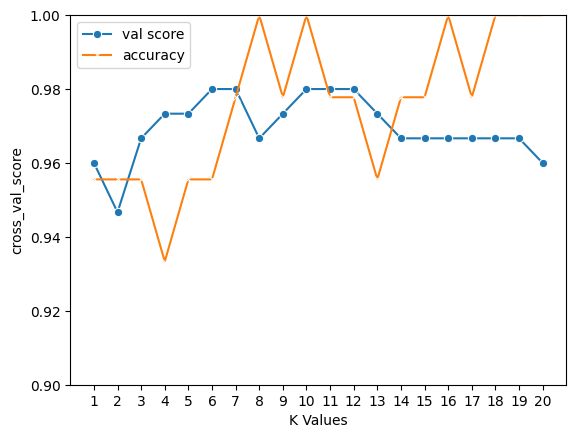

In [76]:
'''
The  KNeighborsClassifier model has the best accuracy so we gonna test for which value of n_neighbors it has the best crossval_score
'''
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,21)]
val_scores = []
accuracies=[]


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # make a new model
    knn.fit(X_train.values,y_train)  #fit the values on the model
    y_pred = knn.predict(X_test)  #predict the outcome
    val_score =  cross_val_score(knn, X, y, cv=5)  # export the cross_val_scores
    val_scores.append(np.mean(val_score))  #store the scores
    accuracy = accuracy_score(y_test,y_pred) #export the accuracy of the model
    accuracies.append(accuracy) #store the accuracy for visualization
    print(f'for n_neighbors={k}, cross_val_score={round(np.mean(val_score),3)} Accuracy:{round(accuracy*100)}%') #print the results


#visualise the score results
sns.lineplot(x = k_values, y = val_scores, marker = 'o',label ='val score' )
sns.lineplot(x = k_values, y = accuracies, marker = 'x',label ='accuracy')
plt.xlabel("K Values")
plt.ylabel("cross_val_score")
plt.ylim((0.9,1))
plt.xlim((0,21))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.legend()
plt.show()


Based on the results, we'll select** k=7**. It achieves the same cross-validation score as **k=6** but has a slightly higher test set accuracy. We generally avoid models with 100% accuracy on the test set, as this could indicate overfitting. **k=7** provides a good balance between cross-validation performance and test set accuracy, suggesting better generalization capabilities."

In [77]:
## Train the kNN model with k=6 neighbors
knn1 = KNeighborsClassifier(n_neighbors= 7 )
knn1.fit(X_train, y_train)

y_pred = knn1.predict(X_test)

# Evaluate the model using appropriate metrics
'''With average='micro',  precision/recall is computed for each class and then the average is taken'''
accuracy = metrics.accuracy_score(y_test, y_pred) # the ratio of correctly predicted instances to the total number of instances:
precision = metrics.precision_score(y_test, y_pred,average="macro") #Proportion of positive predictions that were actually correct (out of all predicted positives)
recall = metrics.recall_score(y_test, y_pred,average='macro') #Proportion of actual positive cases the model identified correctly (out of all actual positives)
F1 = metrics.f1_score(y_test, y_pred, average='macro') # f1_score = 2 * (Precision * Recall) / (Precision + Recall)

#print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1 score:", F1)

Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9722222222222222
f1 score: 0.9731615673644659


[[20  0  0]
 [ 0 11  1]
 [ 0  0 13]]


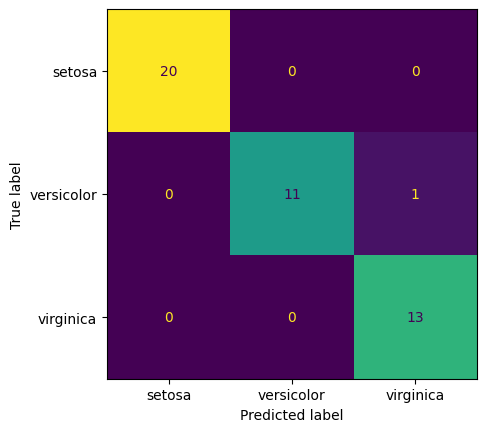

In [79]:
#build the confusion matrix for our predictions and visualise the results
mcm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(mcm,display_labels=iris_df.species.unique())
disp.plot()
disp.im_.colorbar.remove()
print(disp.confusion_matrix)

In [80]:
#one sample for every spiece
print(f'{iris_df.loc[1]}\n{iris_df.loc[66]}\n{iris_df.loc[141]}')

sepal_length       4.9
sepal_width        3.0
petal_length       1.4
petal_width        0.2
species         setosa
Name: 1, dtype: object
sepal_length           5.6
sepal_width            3.0
petal_length           4.5
petal_width            1.5
species         versicolor
Name: 66, dtype: object
sepal_length          6.9
sepal_width           3.1
petal_length          5.1
petal_width           2.3
species         virginica
Name: 141, dtype: object


In [82]:
#testing the model with samples from the dataframe
testing_from_df =[[4.9, 3.0, 1.4,	0.2], [5.6, 3.0, 4.5, 1.5], [6.9, 3.1, 5.1, 2.3]]
predictions_from_df = knn.predict(testing_from_df)
print(f'predictions {predictions_from_df}')

predictions ['setosa' 'versicolor' 'virginica']


In [83]:
'''let's use our model to predict the species for flowers with random characteristics'''
#first we will find the min and max values for every characteristic (collumns in X) and store them in a list
min_list=[]
max_list=[]
for x in X:
  min_x = X[x].min()
  min_list.append(min_x)
  max_x= X[x].max()
  max_list.append(max_x)
  print(f'{x}_min = {min_x} \t {x}_max={max_x}')

sepal_length_min = 4.3 	 sepal_length_max=7.9
sepal_width_min = 2.0 	 sepal_width_max=4.4
petal_length_min = 1.0 	 petal_length_max=6.9
petal_width_min = 0.1 	 petal_width_max=2.5


In [91]:
#in the second step we create 4 lists for every characteristic with random numbers in the range of our min and max lists from the previous step, with 1 decimal point
rand_sepal_length = np.around(np.random.uniform(min_list[0], max_list[0], size=4),1)
rand_sepal_width = np.around(np.random.uniform(min_list[1], max_list[1], size=4),1)
rand_petal_length = np.around(np.random.uniform(min_list[2], max_list[2], size=4),1)
rand_petal_width = np.around(np.random.uniform(min_list[3], max_list[3], size=4),1)
print("rand_sepal_length:",rand_sepal_length)
print("rand_sepal_width:", rand_sepal_width)
print("rand_petal_length:",rand_petal_length)
print("rand_petal_width:", rand_petal_width)

# Create a final list containing sample data
# This list will have four sub-lists, each representing a sample
# Each sample sub-list will have one value for each characteristic

testing_with_random=[]
i=0
while i<4:
  test=[rand_sepal_length[i], rand_sepal_width[i], rand_petal_length[i], rand_petal_width[i]]
  i+=1
  testing_with_random.append(test)
print(testing_with_random)

rand_sepal_length: [5.1 6.  6.  5.6]
rand_sepal_width: [2.1 2.4 2.8 2.6]
rand_petal_length: [4.1 3.7 2.2 6.5]
rand_petal_width: [0.8 0.6 1.3 0.2]
[[5.1, 2.1, 4.1, 0.8], [6.0, 2.4, 3.7, 0.6], [6.0, 2.8, 2.2, 1.3], [5.6, 2.6, 6.5, 0.2]]


In [92]:
#testing the model with the random numbers
predictions_from_df = knn.predict(testing_with_random)
print(f'predictions {predictions_from_df}')

predictions ['versicolor' 'versicolor' 'setosa' 'virginica']
